# **Análise de ações**

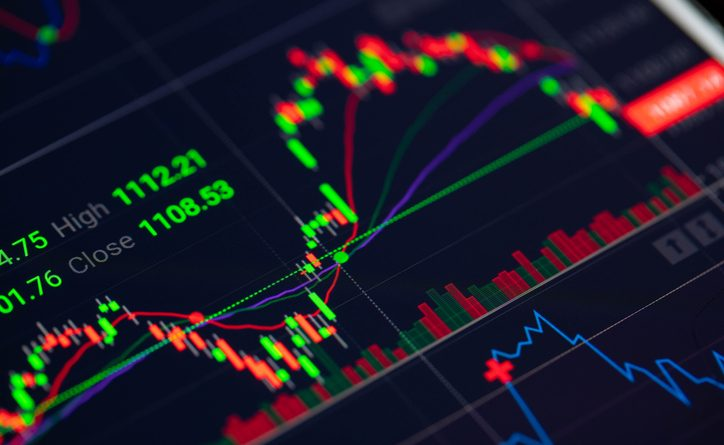


Neste projeto vamos fazer uma análise exploratória do preço das ações.
Vamos nos concentrar nas ações do banco e ver como eles performaram durante a crise financeira até o início de 2020

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline

# **Dados**

Precisamos obter dados usando o datareader de pandas. Obteremos informações sobre ações para os seguintes bancos:

* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

Vamos pegar os dados das ações de 1 de janeiro de 2006 até 1 de janeiro de 2020 e vamos separar um dataframe para cada banco

In [2]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2020, 1, 1)

# Bank of America
BAC = data.DataReader('BAC', 'yahoo', start, end)

# CitiGroup
C = data.DataReader('C', 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader('GS', 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader('JPM', 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader('MS', 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader('WFC', 'yahoo', start, end)

Vamos criar uma lista com os tickers de cada banco.

Tickers = são os códigos das ações/ instituições, por exemplo o banco da américa é BAC ou o CitiGrpup é C etc..

In [3]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Vamos concatenar os dataframes

In [4]:
bankstocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)


In [5]:
bankstocks.columns.names=['Bank Ticker', 'Stock Info']

In [6]:
bankstocks.head()

Bank Ticker        BAC                        ...        WFC                       
Stock Info        High        Low       Open  ...      Close      Volume  Adj Close
Date                                          ...                                  
2010-01-04   15.750000  15.120000  15.240000  ...  27.320000  39335700.0  20.318752
2010-01-05   16.209999  15.700000  15.740000  ...  28.070000  55416000.0  20.876556
2010-01-06   16.540001  16.030001  16.209999  ...  28.110001  33237000.0  20.906300
2010-01-07   17.190001  16.510000  16.680000  ...  29.129999  61649000.0  21.664902
2010-01-08   17.100000  16.629999  16.980000  ...  28.860001  35508700.0  21.464094

[5 rows x 36 columns]

# **Análise Exploratória de Dados**

Preço máximo de fechamento para o estoque de cada banco durante todo o período

In [7]:
bankstocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     35.520000
C       80.080002
GS     273.380005
JPM    139.399994
MS      58.910000
WFC     65.930000
dtype: float64

In [8]:
returns = pd.DataFrame()

Neste DataFrame vazio chamado returns que criamos irá conter as ações de cada banco, na linha abaixo iremos trazer essas ações e por os valores no df returns

In [9]:
for tick in tickers:
  returns[tick + 'Return'] = bankstocks[tick]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.032505,0.038235,0.017680,0.019370,0.036558,0.027452
2010-01-06,0.011728,0.031162,-0.010673,0.005494,0.012796,0.001425
2010-01-07,0.032947,0.002747,0.019568,0.019809,0.014484,0.036286
2010-01-08,-0.008860,-0.016438,-0.018911,-0.002456,-0.020352,-0.009269


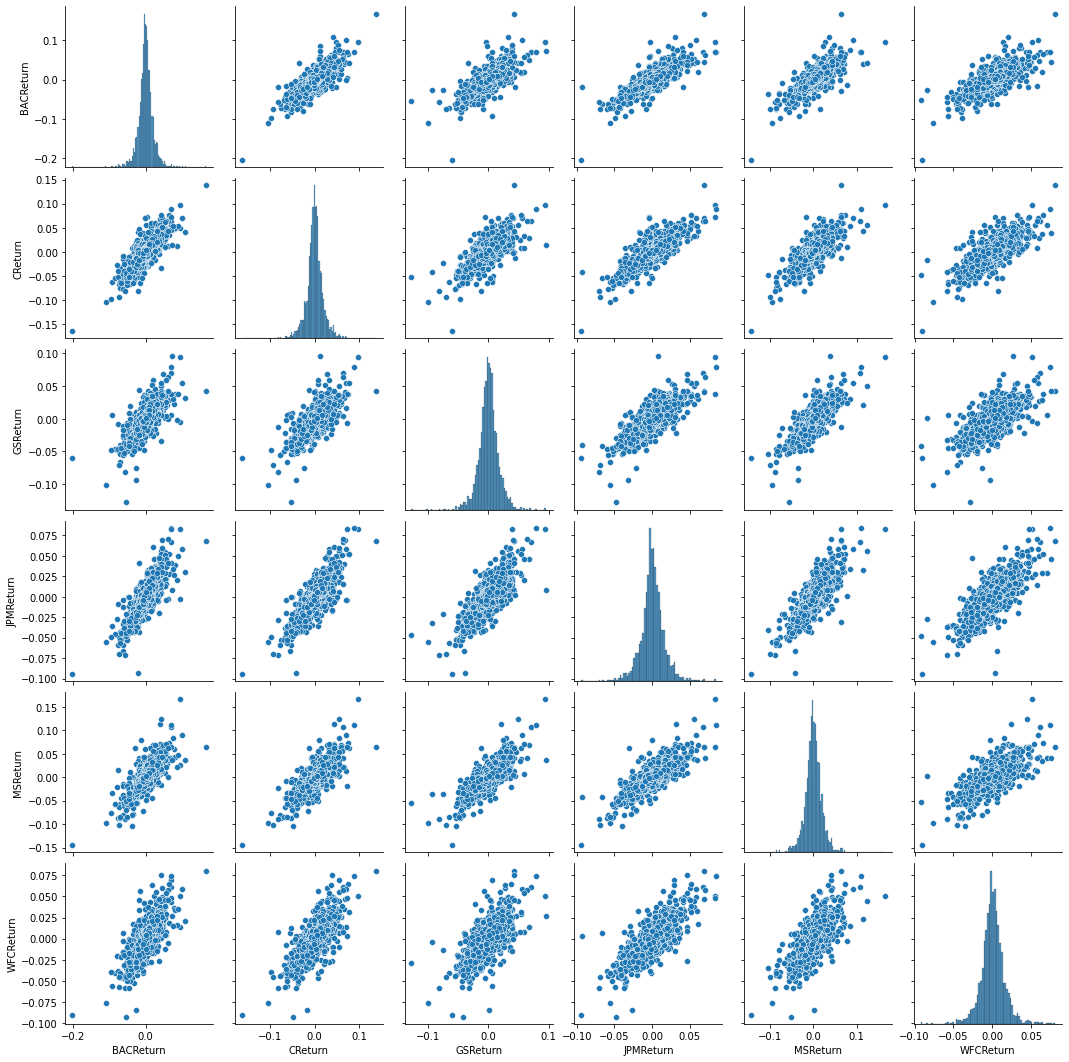

In [10]:
import seaborn as sns
sns.pairplot(returns[1:])

Podemos observar que existe uma relação linear entre os ativos, a maioria dos bancos/ ativos tem uma certa correlação, tendem a subir e cair coletivamente quando fazem parte de um mesmo indice

Datas das ações dos bancos com melhores e piores dias de retorno

In [11]:
# Piores
returns.idxmin()

BACReturn   2011-08-08
CReturn     2011-08-08
GSReturn    2010-04-16
JPMReturn   2011-08-08
MSReturn    2011-08-08
WFCReturn   2018-02-05
dtype: datetime64[ns]

In [12]:
# Melhores
returns.idxmax()

BACReturn   2011-08-09
CReturn     2011-08-09
GSReturn    2019-01-16
JPMReturn   2011-11-30
MSReturn    2011-10-27
WFCReturn   2011-08-09
dtype: datetime64[ns]

Desvio padrão dos retornos

In [13]:
returns.std()

BACReturn    0.020466
CReturn      0.019520
GSReturn     0.016418
JPMReturn    0.015781
MSReturn     0.020769
WFCReturn    0.015169
dtype: float64

Vamos descobrir qual ativo teve maior risco de investimentos para o ano de 2019

In [14]:
returns[(returns.index.date >= dt.date(2019, 1, 1)) & (returns.index.date < dt.date(2020, 1, 1))].std()
# Temos então o CitiGroup(C) com maior volatividade

BACReturn    0.014566
CReturn      0.015354
GSReturn     0.014890
JPMReturn    0.011869
MSReturn     0.014701
WFCReturn    0.012450
dtype: float64

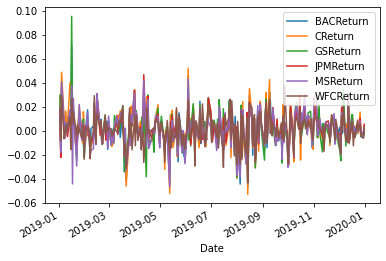

In [15]:
returns[(returns.index.date >= dt.date(2019, 1, 1)) & (returns.index.date < dt.date(2020, 1, 1))].plot()

Vamos ver os retornos de 2019 para o Morgan Stanley

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


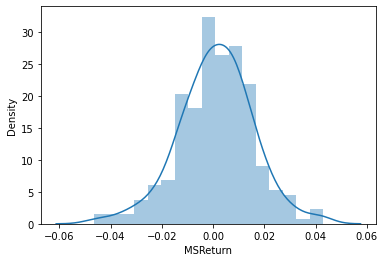

In [16]:
sns.distplot(returns[(returns.index.date >= dt.date(2019, 1, 1)) & (returns.index.date < dt.date(2020, 1, 1))]['MSReturn'])

Ano de 2018

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


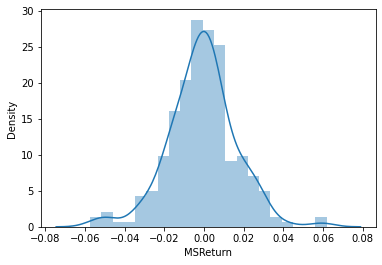

In [22]:
sns.distplot(returns[(returns.index.date >= dt.date(2018, 1, 1)) & (returns.index.date < dt.date(2019, 1, 1))]['MSReturn'])

# **Visualização dos Dados**

Começando com as importações

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Preço de fechamento para cada banco para todo o período

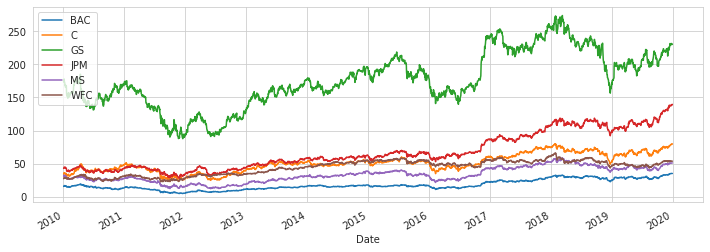

In [29]:
for tick in tickers:
  bankstocks[tick]['Close'].plot(figsize=(12,4), label=tick)
plt.legend()


Vamos ver apenas a coluna "Close"

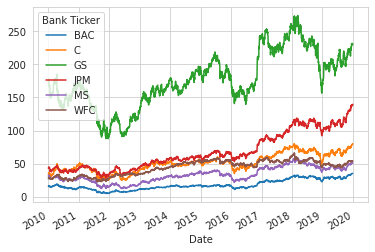

In [31]:
bankstocks.xs(key='Close', level='Stock Info', axis=1).plot()

# **Méida Movel**

Analisando as ações do BAC (Bank of America) do ano de 2019.

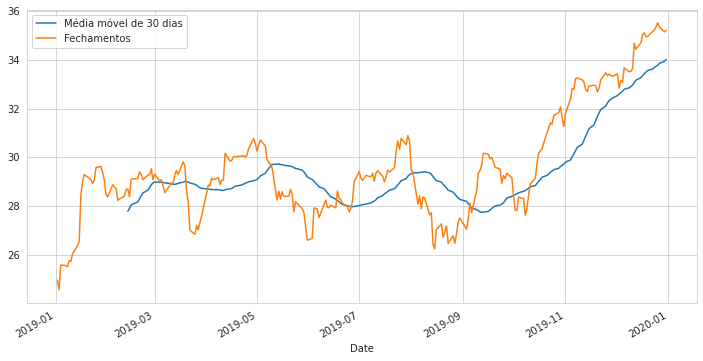

In [52]:
plt.figure(figsize=(12, 6))
bac2019 = BAC['Close'][BAC.index.year == 2019]
bac2019_mm = bac2019.rolling(window=30).mean().plot(label='Média móvel de 30 dias')
bac2019.plot(label='Fechamentos')
plt.legend()


Correlação do fechamento dos ativos

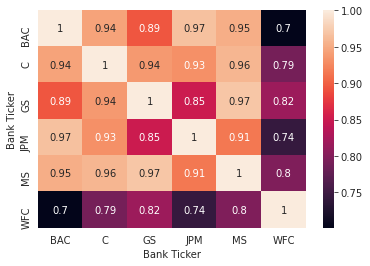

In [53]:
corr_matrix = bankstocks.xs(key='Close', level='Stock Info', axis=1).corr()
sns.heatmap(corr_matrix, annot=True)

Agrupando correlações com o clustermap do seaborn

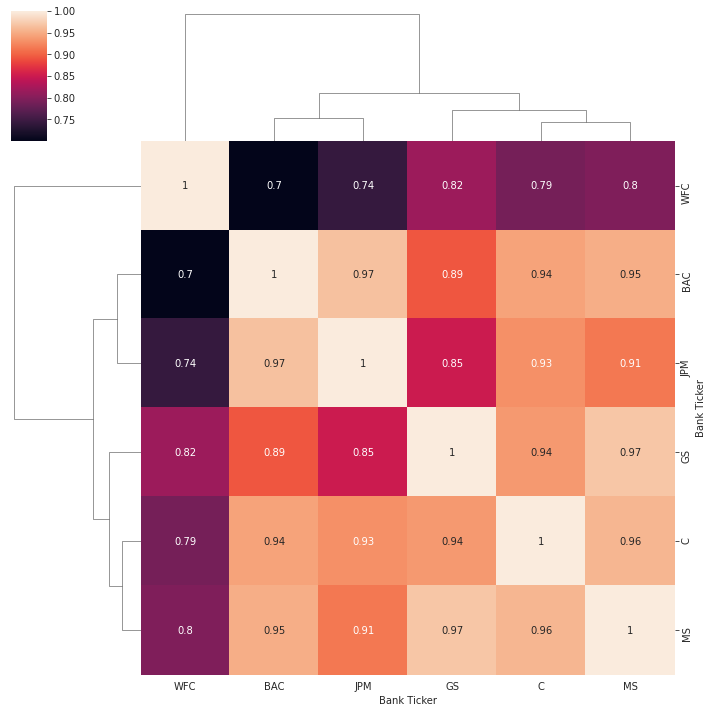

In [54]:
sns.clustermap(corr_matrix, annot=True)